In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import random
import numpy as np
import joblib  # To save the encoder

np.random.seed(100)

file_path = "bank_marketing_dataset.csv"
df = pd.read_csv(file_path)

df = df.replace('unknown', pd.NA)
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'contact', 'month', 'day_of_week']
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

if 'subscribed' in df.columns:
    df['subscribed'] = df['subscribed'].map({'no': 0, 'yes': 1})

onehot_encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")

onehot_encoder.fit(df[categorical_cols])

joblib.dump(onehot_encoder, "onehot_encoder.pkl")

encoded_categorical = onehot_encoder.transform(df[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=onehot_encoder.get_feature_names_out(categorical_cols))

df_cleaned = pd.concat([df[numerical_cols + ['subscribed']].reset_index(drop=True), encoded_categorical_df], axis=1)
df_unscaledcopy = df_cleaned.copy()

scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

df_cleaned = df_cleaned.drop(columns=['duration','subscribed'])

df_cleaned.to_csv("preprocessed_bank_marketing.csv", index=False)

print(df_cleaned.head())




        age  campaign     pdays  previous  emp.var.rate  cons.price.idx  \
0  1.533034 -0.565922  0.195414 -0.349494      0.648092        0.722722   
1  1.628993 -0.565922  0.195414 -0.349494      0.648092        0.722722   
2 -0.290186 -0.565922  0.195414 -0.349494      0.648092        0.722722   
3 -0.002309 -0.565922  0.195414 -0.349494      0.648092        0.722722   
4  1.533034 -0.565922  0.195414 -0.349494      0.648092        0.722722   

   cons.conf.idx  euribor3m  nr.employed  job_blue-collar  job_entrepreneur  \
0       0.886447    0.71246      0.33168              0.0               0.0   
1       0.886447    0.71246      0.33168              0.0               0.0   
2       0.886447    0.71246      0.33168              0.0               0.0   
3       0.886447    0.71246      0.33168              0.0               0.0   
4       0.886447    0.71246      0.33168              0.0               0.0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0     

Here we are preprocessing the Kaggle Bank Marketing Dataset to prepare it for clustering analysis. We use one-hot encoding to convert categorical features into numeric form and save the encoder for future use. We standardised numerical columns to ensure all features are on a similar scale. We also removed the 'duration' and 'subscribed' columns since they are likely not relevant for clustering. 

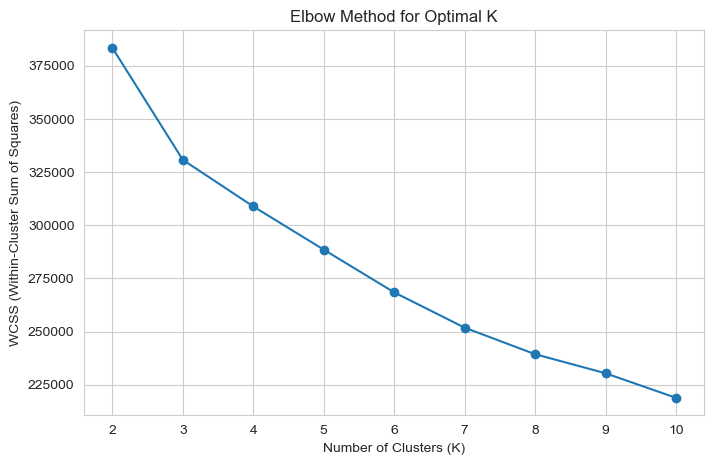

In [51]:
wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cleaned)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

Elbow Method to determine the optimal number of clusters for KMeans clustering.

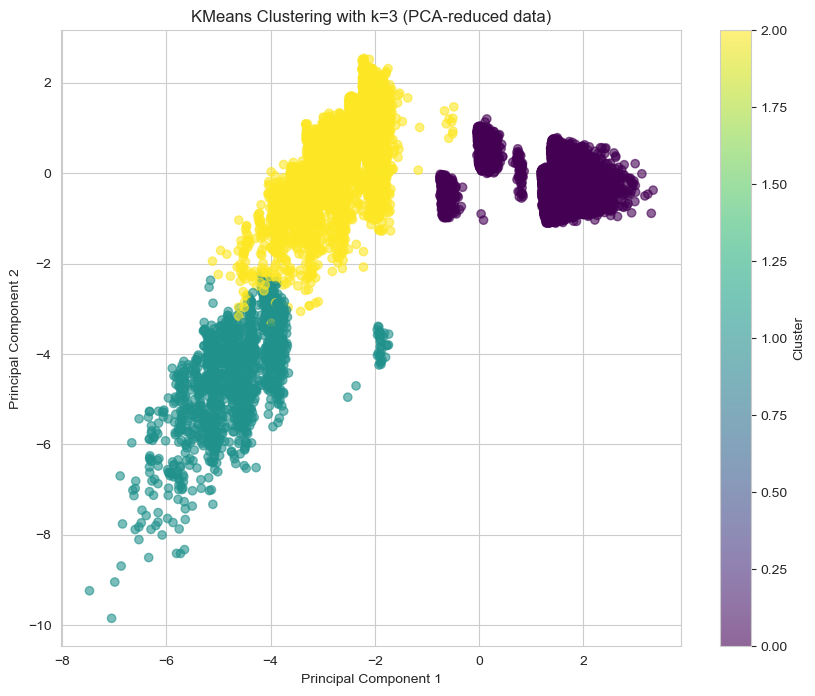

              age  campaign     pdays  previous  emp.var.rate  cons.price.idx  \
cluster                                                                         
0        0.016196  0.084242  0.195414 -0.298476      0.659435        0.463340   
1        0.182266 -0.267185 -5.024241  3.078501     -1.382588       -0.387033   
2       -0.060727 -0.159725  0.195414  0.292002     -1.341399       -1.017600   

         cons.conf.idx  euribor3m  nr.employed  job_blue-collar  \
cluster                                                           
0             0.225974   0.690260     0.641984         0.233822   
1             0.470842  -1.521093    -1.917220         0.083658   
2            -0.581041  -1.394611    -1.232505         0.221732   

         job_entrepreneur  job_housemaid  job_management  job_retired  \
cluster                                                                 
0                0.038416       0.029734        0.072635     0.028794   
1                0.016861       0.02723

In [53]:
# Apply KMeans clustering with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_cleaned['cluster'] = kmeans.fit_predict(df_cleaned)
df_unscaledcopy['cluster']=df_cleaned['cluster'] ##for visualisation of clusters

# Perform PCA to reduce the data to 2 components for visualisation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_cleaned.drop(columns=['cluster']))

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_cleaned['cluster'], cmap='viridis', alpha=0.6)
plt.title(f'KMeans Clustering with k={k} (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

cluster_means = df_cleaned.groupby('cluster').mean()
print(cluster_means)

In [54]:
import pandas as pd

pd.set_option('display.max_columns', None)
print(cluster_means)

              age  campaign     pdays  previous  emp.var.rate  cons.price.idx  \
cluster                                                                         
0        0.016196  0.084242  0.195414 -0.298476      0.659435        0.463340   
1        0.182266 -0.267185 -5.024241  3.078501     -1.382588       -0.387033   
2       -0.060727 -0.159725  0.195414  0.292002     -1.341399       -1.017600   

         cons.conf.idx  euribor3m  nr.employed  job_blue-collar  \
cluster                                                           
0             0.225974   0.690260     0.641984         0.233822   
1             0.470842  -1.521093    -1.917220         0.083658   
2            -0.581041  -1.394611    -1.232505         0.221732   

         job_entrepreneur  job_housemaid  job_management  job_retired  \
cluster                                                                 
0                0.038416       0.029734        0.072635     0.028794   
1                0.016861       0.02723

By observing cluster means, cluster 2 has highest rate of success for previous campaign.

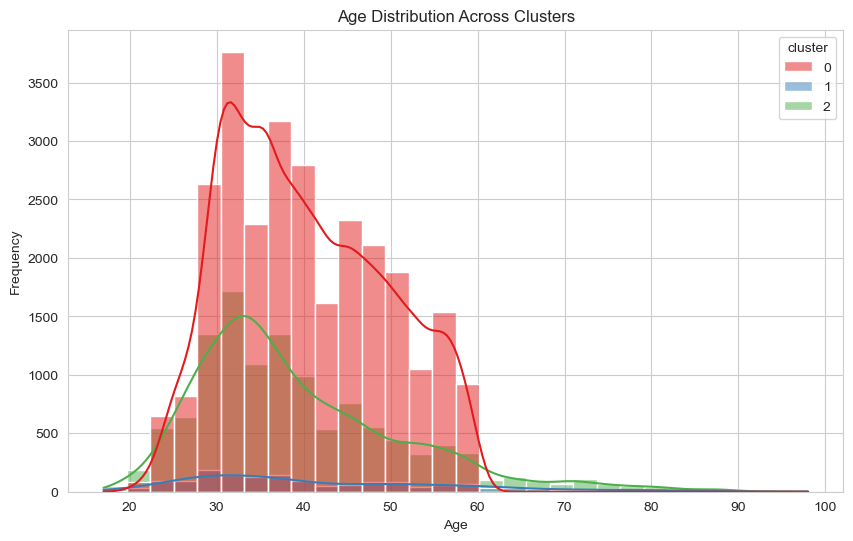

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(data=df_unscaledcopy, x='age', hue='cluster', kde=True, bins=30, palette='Set1')
plt.title('Age Distribution Across Clusters')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Age in clusters are more or less similar, which 30-40 being the majority, cluster 0 of a slightly younger age



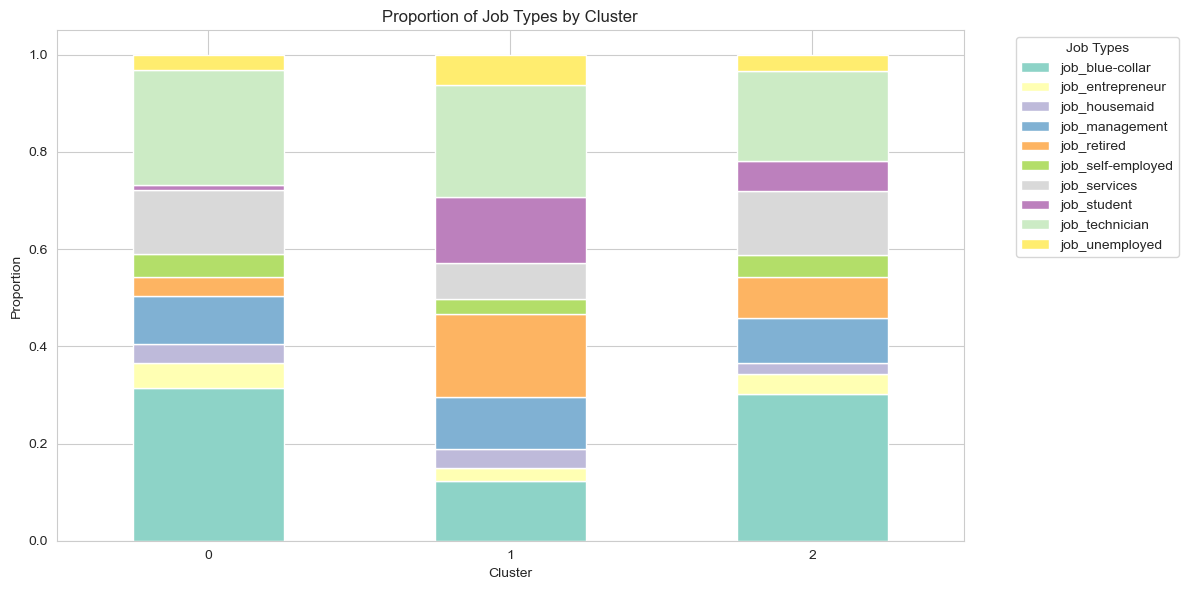

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

job_columns = [col for col in df_unscaledcopy.columns if 'job_' in col]
job_distribution = df_unscaledcopy.groupby('cluster')[job_columns].sum()
job_distribution_proportions = job_distribution.div(job_distribution.sum(axis=1), axis=0)
job_distribution_proportions.plot(kind='bar', stacked=True, figsize=(12, 6),colormap='Set3') ##proportion easier to compare because clusters are of different size
plt.title('Proportion of Job Types by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Job Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



Cluster 2 has higher proportion of student and retired population, thus this group may opt for low-risk financial products. Both Cluster 0 and Cluster 1 has diverse job types, but cluster 1 has higher proportion of higher-paid jobs like entrepreneur, hence may be potentially targeted for future campaigns

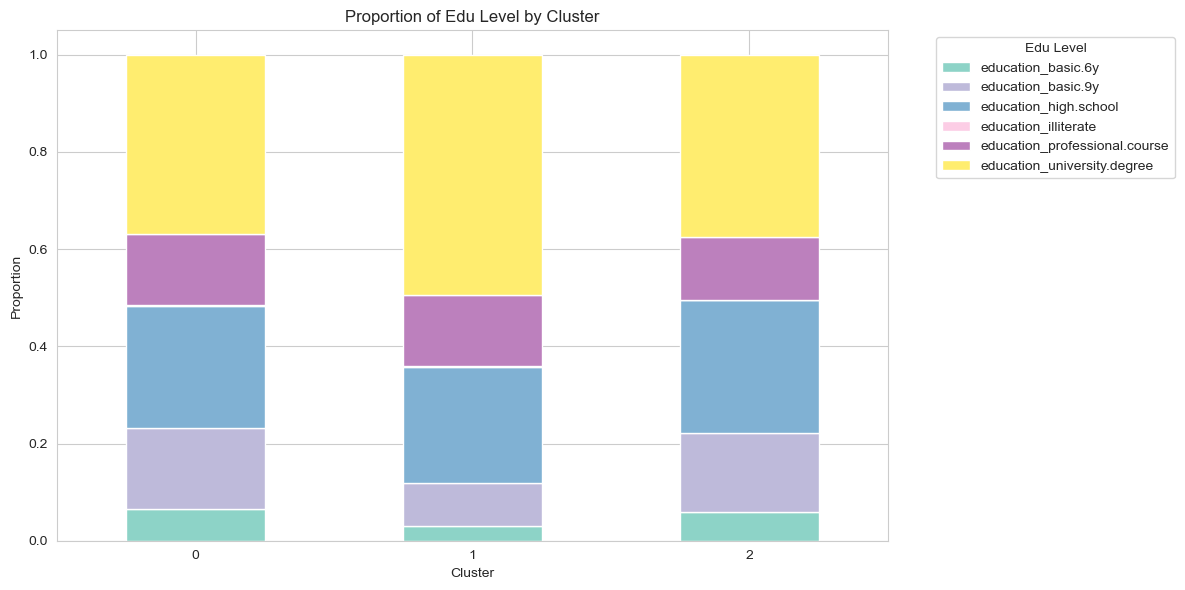

In [60]:
edu_columns = [col for col in df_unscaledcopy.columns if 'education_' in col]
edu_distribution = df_unscaledcopy.groupby('cluster')[edu_columns].sum()
edu_distribution_proportions = edu_distribution.div(edu_distribution.sum(axis=1), axis=0)
edu_distribution_proportions.plot(kind='bar', stacked=True, figsize=(12, 6),colormap='Set3') ##proportion easier to compare because clusters are of different size
plt.title('Proportion of Edu Level by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Edu Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

From the plot, we can see that Cluster 2 has the highest proportion of highly educated individuals. Additionally, Cluster 0 has a slightly higher proportion of customers with university degrees compared to Cluster 1.

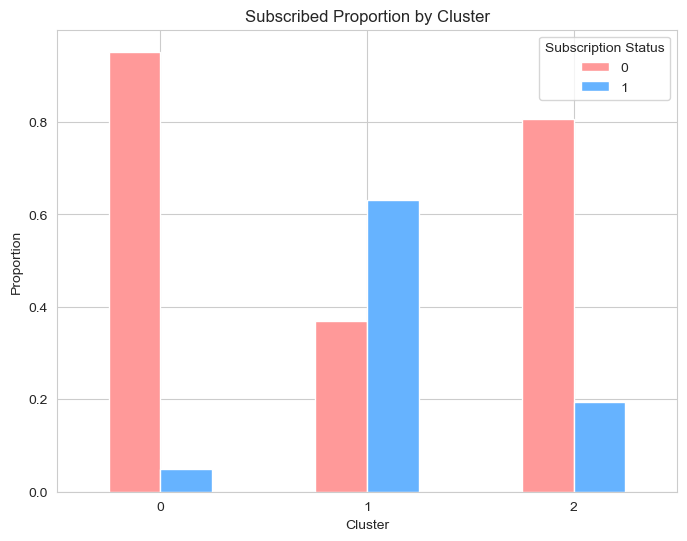

In [62]:
subscribed_proportion = df_unscaledcopy.groupby(['cluster', 'subscribed']).size().unstack()
subscribed_proportion = subscribed_proportion.div(subscribed_proportion.sum(axis=1), axis=0)
subscribed_proportion.plot(kind='bar', stacked=False, figsize=(8, 6), color=['#FF9999', '#66B3FF'])
plt.title('Subscribed Proportion by Cluster')  ##proportion for easier comparison
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Subscription Status', loc='upper right')
plt.xticks(rotation=0)
plt.show()



Higher proportion of cluster 2 subscribed to term deposit, revealing their interests in more financial secure campaigns, while cluster 0 has higher proportion of engagement than cluster 1

#Key Segments
######Cluster 0: Diverse job types. Moderate subscription to term deposits. Response rate is low for the previous campaign. These are occasional users that show some interest in financial products but are not strongly engaged.
######Cluster 1: Diverse job types with more high paying jobs. Lowest subsciption to term deposits. Most were not contacted for the previous marketing campaign. These are budget conscious clients that are less interested in term deposits, may prefer other type of financial products.
######Cluster 2: Relatively higher proportion of retired individuals and students, higher subscription to term deposits. Contacted recently and response to the previous marketing campaign is high. These are high value customers who are more engaged and willing to invest in financial products.


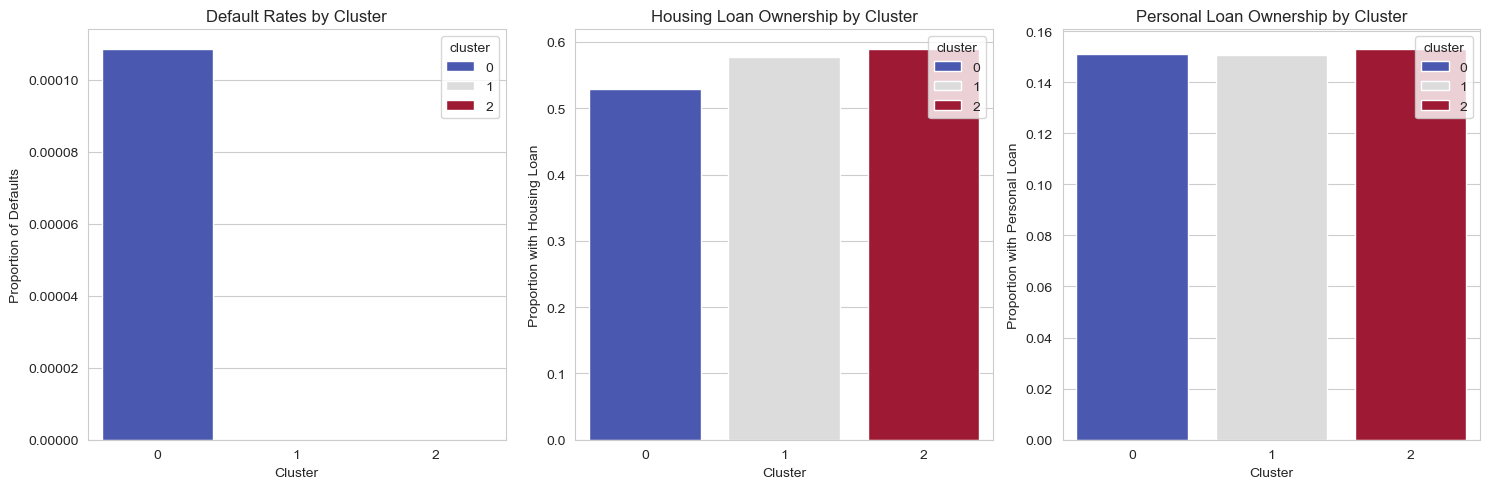

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=df_unscaledcopy,x=df_unscaledcopy["cluster"], y=df_unscaledcopy["default_yes"], ax=axes[0],hue='cluster', palette="coolwarm",errorbar=None)
axes[0].set_title("Default Rates by Cluster")
axes[0].set_ylabel("Proportion of Defaults")
axes[0].set_xlabel("Cluster")

sns.barplot(data=df_unscaledcopy,x=df_unscaledcopy["cluster"], y=df_unscaledcopy["housing_yes"], ax=axes[1],hue='cluster', palette="coolwarm",errorbar=None)
axes[1].set_title("Housing Loan Ownership by Cluster")
axes[1].set_ylabel("Proportion with Housing Loan")
axes[1].set_xlabel("Cluster")

sns.barplot(data=df_unscaledcopy,x=df_unscaledcopy["cluster"], y=df_unscaledcopy["loan_yes"], ax=axes[2], hue='cluster', palette="coolwarm",errorbar=None)
axes[2].set_title("Personal Loan Ownership by Cluster")
axes[2].set_ylabel("Proportion with Personal Loan")
axes[2].set_xlabel("Cluster")
plt.tight_layout()
plt.show()



Since all 3 clusters have default value very close to 0, default value is not very meaningful in describing the clusters. We'll look at housing and personal loans.

Cluster 0 has both highest personal loan and housing loan, marketing campaigns can be targeted at top-up loans/loan refinancing

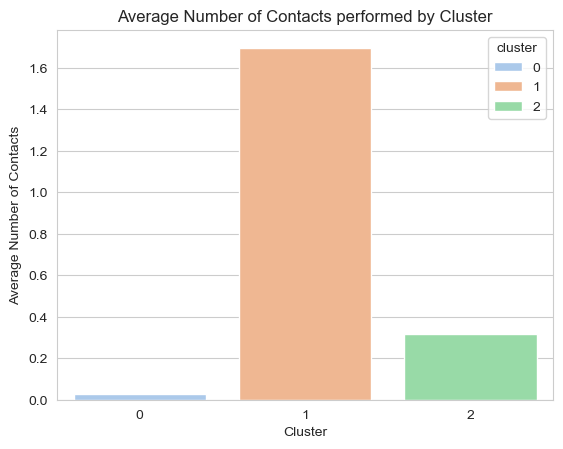

In [67]:
sns.barplot(x='cluster', y='previous', data=df_unscaledcopy, errorbar=None,palette='pastel',hue='cluster')
plt.title('Average Number of Contacts performed by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Contacts')
plt.show()


Cluster 2 has the highest number of contact, while cluster 1 is targeted least frequently.

#**Behavioural Patterns**

In conclusion, Cluster 0 has moderate engagement in term deposits, and has the highest loans. In the previous marketing campaign, response rate is low. This group may require more tailored marketing like flexible mortgage plans/top up loans to re-engage them.

Cluster 1 is least engaged in term deposits, consists of more professionals with high paying jobs, they were previously not targeted by marketing campaigns, but may be potential targets for high-return investment or stock trading campaigns.

Cluster 2 is highly responsive to the previous marketing campaign and has been contacted frequently. This group has highest term deposit subscription, and hence may be more interested in low-risk investment/long term saving plans





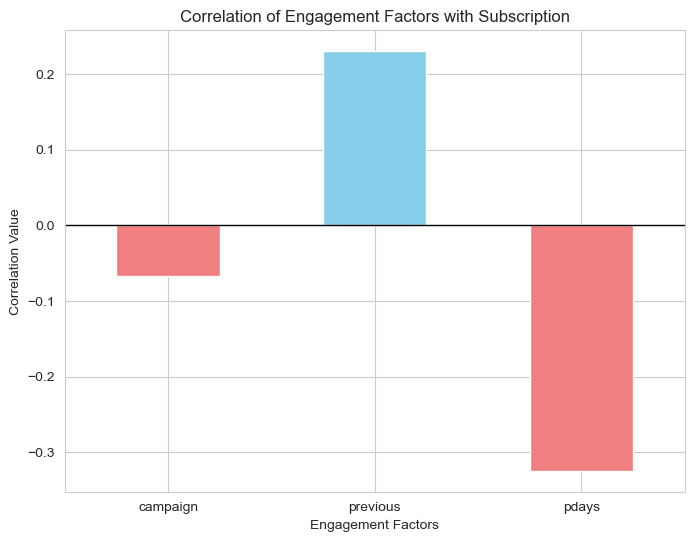

In [70]:
engagement_factors = ["campaign", "previous", "pdays"]
engagement_corr = df_unscaledcopy[engagement_factors + ["subscribed"]].corr()
engagement_corr_subscribed = engagement_corr["subscribed"]

plt.figure(figsize=(8, 6))
colours = ["lightcoral" if val < 0 else "skyblue" for val in engagement_corr_subscribed.drop("subscribed")]
engagement_corr_subscribed.drop("subscribed").plot(kind="bar", color=colours)
plt.title("Correlation of Engagement Factors with Subscription")
plt.ylabel("Correlation Value")
plt.xticks(rotation=0)
plt.xlabel("Engagement Factors")
plt.axhline(0, color="black", linewidth=1)
plt.show()


The bar chart illustrates the correlation between key engagement factors and the likelihood of a customer subscribing to a term deposit. The variable "previous" (number of times a customer was contacted before this campaign), has a positive correlation with subscription, suggesting that prior interactions increase the chances of a successful conversion.

Conversely, "campaign" (number of contacts performed during the current campaign) and "pdays" (number of days that passed by after the client was last contacted from a previous campaign), show negative correlations. The negative correlation of "pdays" suggests that longer gaps between contacts reduce the likelihood of subscription. Similarly, the "campaign" variable’s negative correlation implies that repeated contacts within the same campaign may lead to lower number of returns or customer fatigue.

These insights indicate that while past engagement positively influences subscription rates, excessive or poorly spaced-out contacts may have adverse effects. Optimising the timing and frequency of outreach could improve the success of future campaigns.

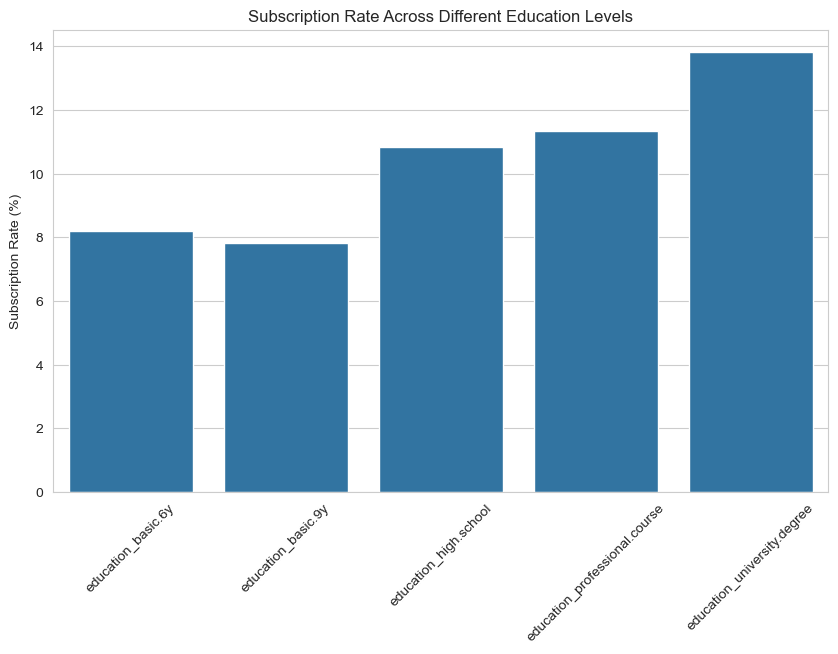

In [72]:
education_levels = ['education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree']
education_rates = []

for column in education_levels:
        subscription_rate = df_unscaledcopy[df_unscaledcopy[column] == 1]['subscribed'].mean()* 100
        education_rates.append(subscription_rate)

plt.figure(figsize=(10, 6))
sns.barplot(x=education_levels, y=education_rates)
plt.title('Subscription Rate Across Different Education Levels')
plt.xticks(rotation=45)
plt.ylabel('Subscription Rate (%)')
plt.show()

Amongst the customers that have received education, customers with higher education levels have higher tendency to subscribe to a term deposit. Higher education might correlate with better financial literacy. As they understand the benefits of term deposits and are thus more inclined to subscribe.

Another assumption is that individuals with higher education have more income and savings, thus they have the disposible income to invest in term deposits. This insight suggests that marketing campaigns could be more effective if targeted toward customers with higher education backgrounds, as they may be more inclined to subscribe.

In [74]:
import pandas as pd
import numpy as np
import joblib

# Load the saved OneHotEncoder
onehot_encoder = joblib.load("onehot_encoder.pkl")
# Df to save new data
accumulated_data = pd.DataFrame()

def real_time_segmentation():
    global accumulated_data, kmeans
    customer_count = 0
    while True:
        # Simulate new raw data
        raw_customer_data = {
            "age": np.random.randint(18, 70),
            "job": np.random.choice(["admin.", "blue-collar", "technician", "housemaid"]),
            "marital": np.random.choice(["married", "single", "divorced"]),
            "education": np.random.choice(["basic.4y", "basic.6y", "high.school"]),
            "default": np.random.choice(["yes", "no"]),
            "housing": np.random.choice(["yes", "no"]),
            "loan": np.random.choice(["yes", "no"]),
            "contact": np.random.choice(["telephone", "cellular"]),
            "month": np.random.choice(["may", "jun", "jul"]),
            "day_of_week": np.random.choice(["mon", "tue", "wed"]),
            "duration": np.random.randint(100, 500),
            "campaign": np.random.randint(1, 5),
            "pdays": np.random.randint(0, 999),
            "previous": np.random.randint(0, 5),
            "poutcome": np.random.choice(["success", "failure", "nonexistent"]),
            "emp.var.rate": np.random.uniform(-3, 2),
            "cons.price.idx": np.random.uniform(90, 95),
            "cons.conf.idx": np.random.uniform(-50, -30),
            "euribor3m": np.random.uniform(0.5, 5),
            "nr.employed": np.random.uniform(5000, 5300),
            "subscribed": np.random.choice(["yes", "no"])
        }

        new_data = pd.DataFrame([raw_customer_data])

        if 'subscribed' in new_data.columns:
            new_data['subscribed'] = new_data['subscribed'].map({'no': 0, 'yes': 1})

        # One-hot encode categorical columns using the fitted OneHotEncoder
        encoded_categorical = onehot_encoder.transform(new_data[categorical_cols])
        encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=onehot_encoder.get_feature_names_out(categorical_cols))

        new_data_encoded = pd.concat([new_data[numerical_cols].reset_index(drop=True), encoded_categorical_df], axis=1)

        new_data_encoded[numerical_cols] = scaler.transform(new_data_encoded[numerical_cols])

        if 'duration' in new_data_encoded.columns:
            new_data_encoded = new_data_encoded.drop(columns=['duration'])


        predicted_cluster = kmeans.predict(new_data_encoded)
        new_data_encoded['cluster'] = predicted_cluster
        print(new_data_encoded.head())

        # Add new data to accumulated df
        accumulated_data = pd.concat([accumulated_data, new_data_encoded], ignore_index=True)
        customer_count += 1

        # Retrain model once it hits 500
        if customer_count >= 500:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(accumulated_data.drop(columns=['cluster']))
            # Save new model
            joblib.dump(kmeans, "kmeans_model.pkl")

            accumulated_data = pd.DataFrame()
            customer_count = 0
            

        break


# Start the real-time segmentation simulation
real_time_segmentation()

        age  campaign     pdays  previous  emp.var.rate  cons.price.idx  \
0 -1.345734  0.156105 -1.126087 -0.349494      0.025255       -1.656653   

   cons.conf.idx  euribor3m  nr.employed  job_blue-collar  job_entrepreneur  \
0       0.377803  -1.784517    -1.035409              0.0               0.0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0            0.0             0.0          0.0                0.0   

   job_services  job_student  job_technician  job_unemployed  marital_married  \
0           0.0          0.0             0.0             0.0              1.0   

   marital_single  education_basic.6y  education_basic.9y  \
0             0.0                 0.0                 0.0   

   education_high.school  education_illiterate  education_professional.course  \
0                    1.0                   0.0                            0.0   

   education_university.degree  default_yes  housing_yes  loan_yes  \
0                          0.0    

This code simulates real-time customer segmentation using K-Means clustering. It generates simulated customer data, mimicking real-time entries with randomly assigned demographic and campaign-related attributes. The data is then preprocessed and assigned to a customer segment using a trained K-Means model. The predicted cluster label is added to the dataset, which is continuously updated as new data is received. Once 500 new entries have been processed, the script re-trains the K-Means model with the updated dataset, saves the new model, and resets the accumulated dataset before repeating the process.

This adaptive segmentation approach ensures that the model remains relevant and responsive to shifts in customer behavior. By continuously refining segmentation, businesses can detect changing preferences, identify emerging trends, and personalise marketing efforts in real time. This is particularly valuable for marketing strategies, as it helps businesses deliver targeted promotions, optimise customer engagement, and improve conversion rates. 

For example, an e-commerce platform can recommend products based on a customer’s most recent interactions rather than relying on outdated segmentation. This approach enhances customer experience, increases engagement, and ensures that marketing efforts remain both cost-effective and data-driven.